## Fall Detection Data from China
- Activity of elderly patients along with their medical information


In [14]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("fall_detection.csv")

In [3]:
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,3,4722.92,4019.64,-1600.00,13,79,317,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4059.12,2191.03,-1146.08,20,54,165,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4773.56,2787.99,-1263.38,46,67,224,NaN,NaN,NaN,NaN,NaN,NaN
3,4,8271.27,9545.98,-2848.93,26,138,554,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7102.16,14148.80,-2381.15,85,120,809,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df1=df.iloc[:,0:7]

In [38]:
raw=df1

In [9]:
df1.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [182]:
df1.shape

(12702, 7)

In [10]:
df1.dtypes

ACTIVITY         int64
TIME           float64
SL             float64
EEG            float64
BP               int64
HR               int64
CIRCLUATION      int64
dtype: object

In [12]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ACTIVITY,16382.0,2.361494,1.739195,0.000000e+00,0.000,3.000,4.00,5.0
TIME,16382.0,10936.842478,5261.463601,1.954230e+03,7263.685,9769.355,13481.65,50895.5
SL,16382.0,75271.979925,127502.241688,4.222420e+01,9941.170,31189.200,80761.45,2426140.0
EEG,16382.0,-5621.125313,108220.924420,-1.262600e+07,-5630.000,-3361.275,-2150.00,1410000.0
BP,16382.0,58.251068,48.292926,0.000000e+00,25.000,44.000,78.00,533.0
HR,16382.0,211.536992,129.949521,3.300000e+01,119.000,180.000,271.00,986.0
CIRCLUATION,16382.0,2894.341472,3825.927830,5.000000e+00,587.000,1581.000,3539.00,52210.0


In [13]:
#check if there any null values
df1.isnull().sum() #no null values

ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64

In [15]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
count,16382.000000,16382.000000,1.638200e+04,1.638200e+04,16382.000000,16382.000000,16382.000000
mean,2.361494,10936.842478,7.527198e+04,-5.621125e+03,58.251068,211.536992,2894.341472
std,1.739195,5261.463601,1.275022e+05,1.082209e+05,48.292926,129.949521,3825.927830
min,0.000000,1954.230000,4.222420e+01,-1.262600e+07,0.000000,33.000000,5.000000
25%,0.000000,7263.685000,9.941170e+03,-5.630000e+03,25.000000,119.000000,587.000000
50%,3.000000,9769.355000,3.118920e+04,-3.361275e+03,44.000000,180.000000,1581.000000
75%,4.000000,13481.650000,8.076145e+04,-2.150000e+03,78.000000,271.000000,3539.000000
90%,5.000000,18363.400000,1.803541e+05,-1.169946e+03,116.000000,393.900000,6746.000000
95%,5.000000,21955.760000,3.093476e+05,-8.391564e+02,148.000000,482.950000,10237.900000
99%,5.000000,25887.848000,5.214147e+05,-2.368100e+02,245.000000,585.190000,18067.000000


### EDA

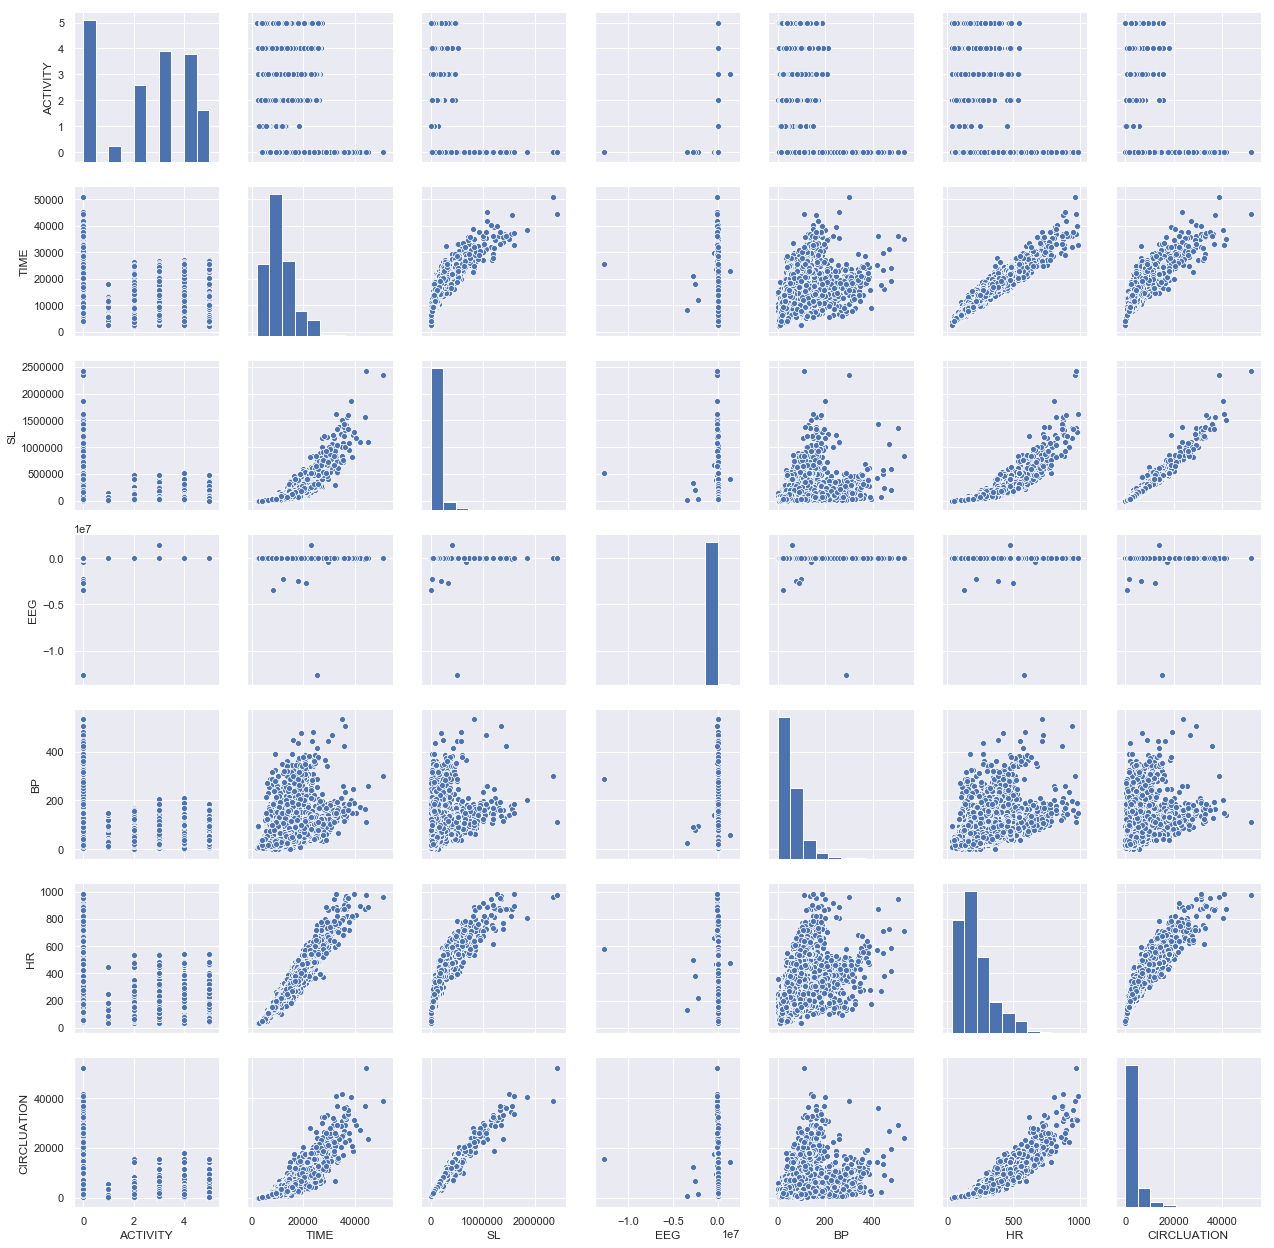

In [16]:
#pair plot
sns.set()
sns.pairplot(df1)

In [27]:
df1.ACTIVITY.unique()

array([3, 2, 4, 5, 0, 1], dtype=int64)

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


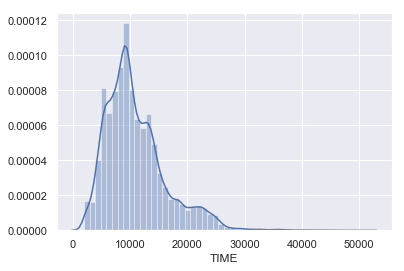

In [18]:
##Hist of TIME
#import seaborn as sns
sns.distplot(df1.TIME,hist=True)    #slightly right skewed

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


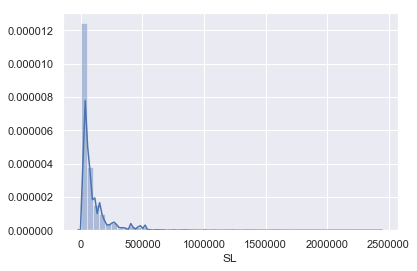

In [19]:
#Histogram of sugarlevel
sns.distplot(df1.SL,hist=True)     #right skewed

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


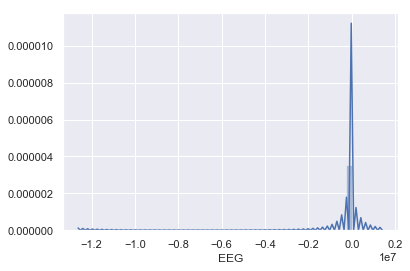

In [20]:
##Hist of EEG monitering table
sns.distplot(df.EEG,hist=True)    #left skewed

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


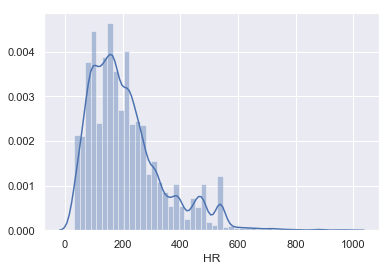

In [21]:
#hist of Heart beat rate
sns.distplot(df1.HR,hist=True)       #right skewed

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


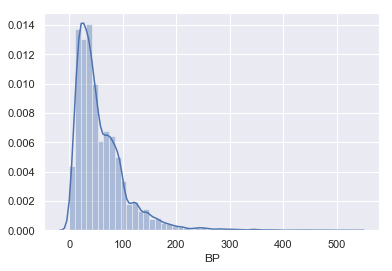

In [22]:
#hist of BP
sns.distplot(df1.BP,hist=True)    #right skewed

### Lets see how activity effects the BP,Heart rate,EEG,Sugar Level,Blood Circulation

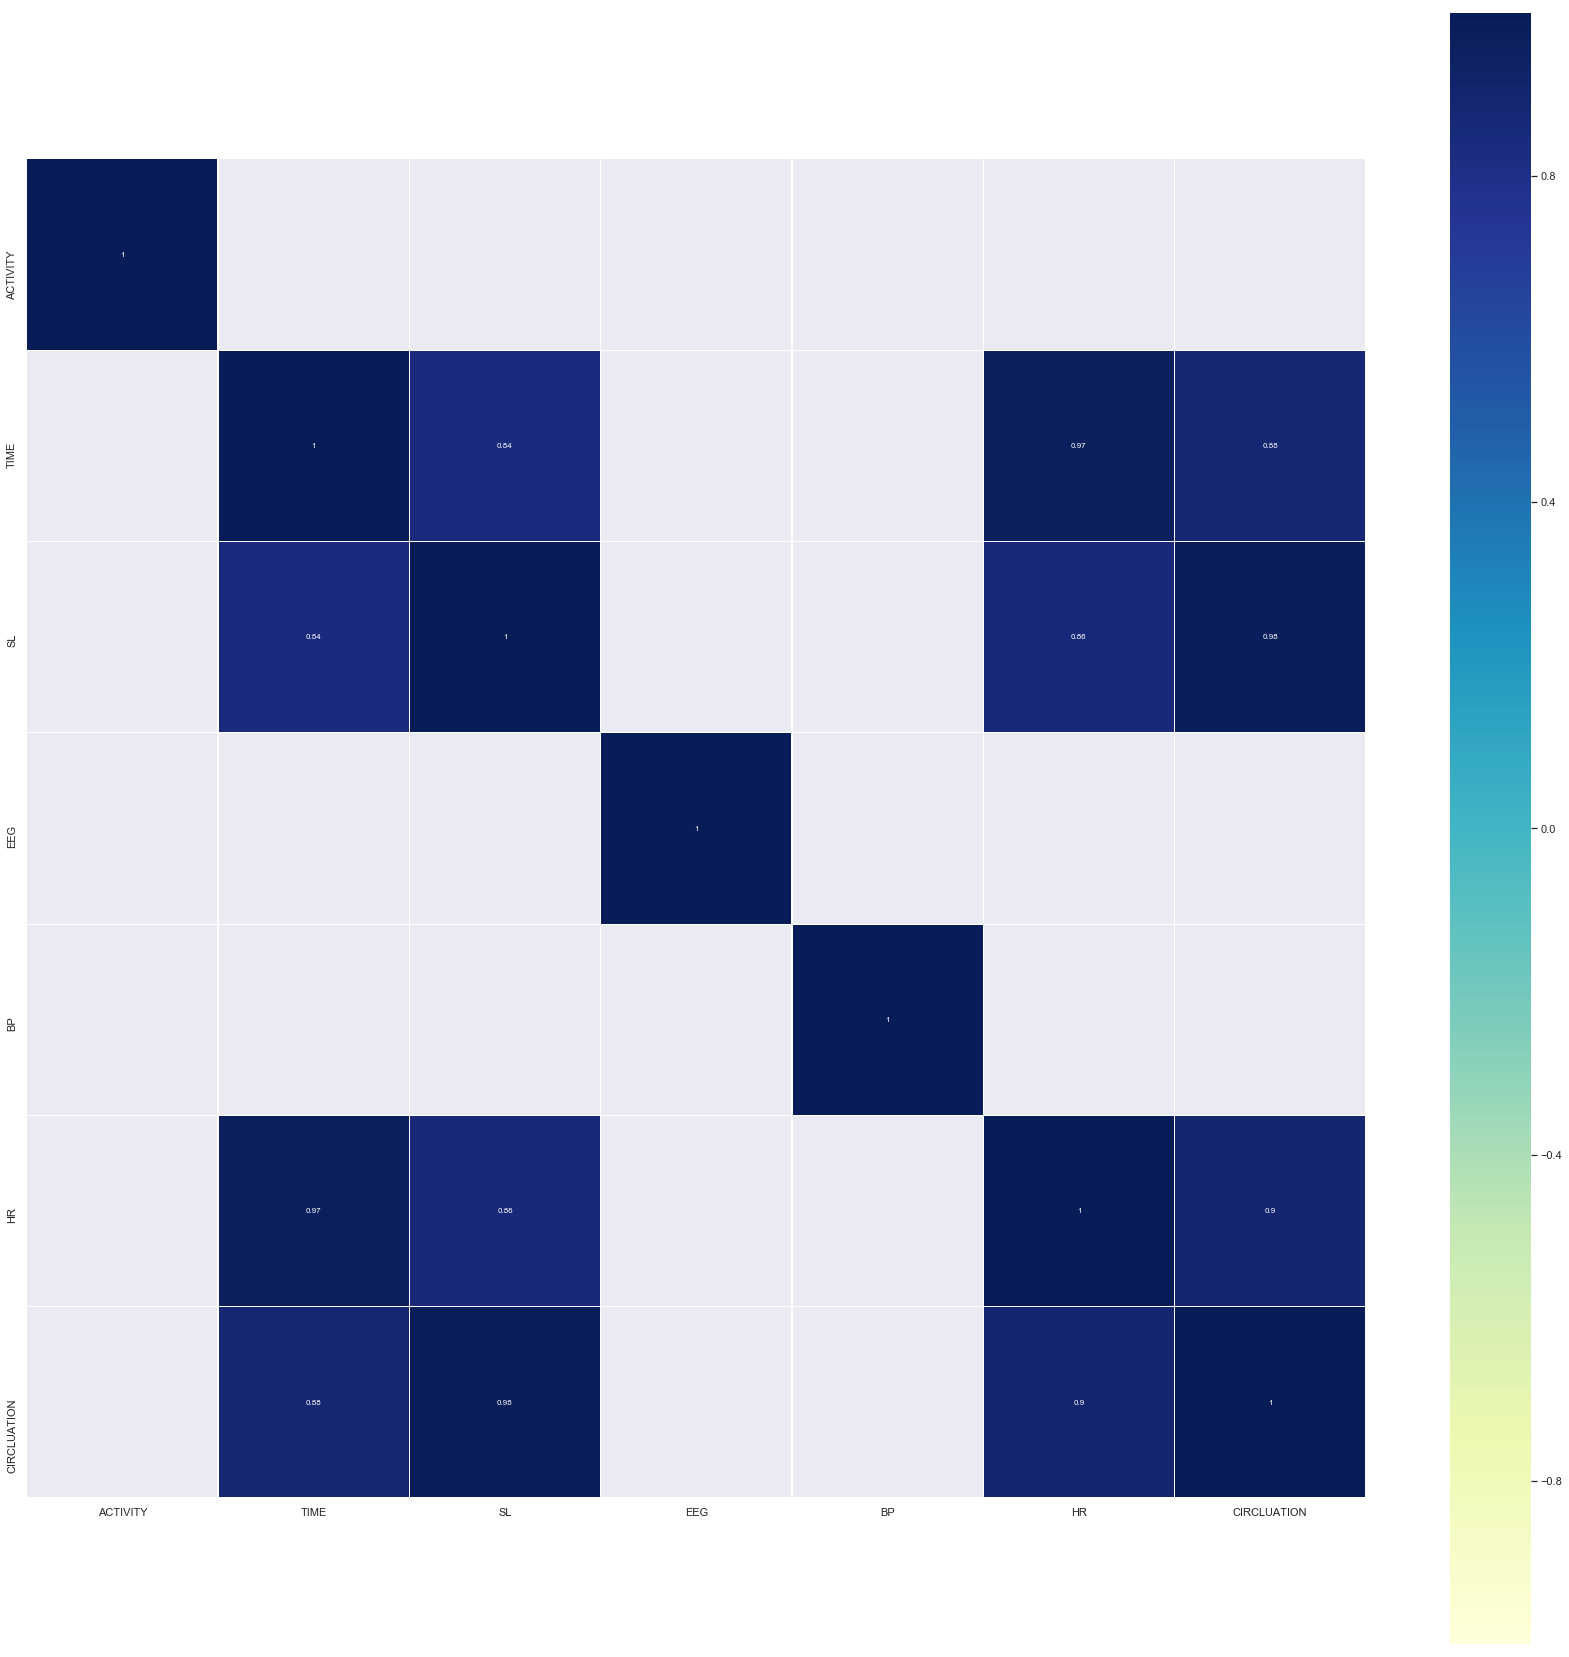

In [23]:
#heat map
#sns.heatmap(df1.corr(),annot = True)
#or
#correration matrix
# Ploting correlation plot
import matplotlib.pyplot as plt
corr=df1.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


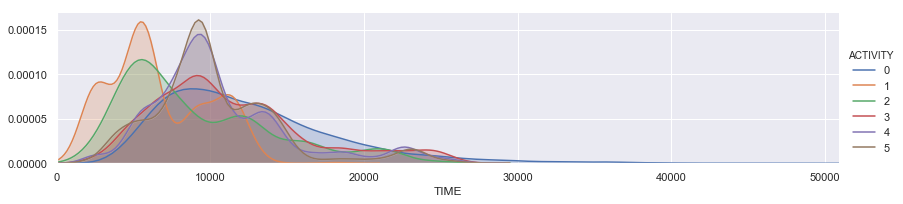

In [26]:
##lets visualize it by facet graphs
#facet graphs
facet = sns.FacetGrid(df1, hue="ACTIVITY",aspect=4)
facet.map(sns.kdeplot,'TIME',shade= True)
facet.set(xlim=(0, df1['TIME'].max()))
facet.add_legend();    #time and activity

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


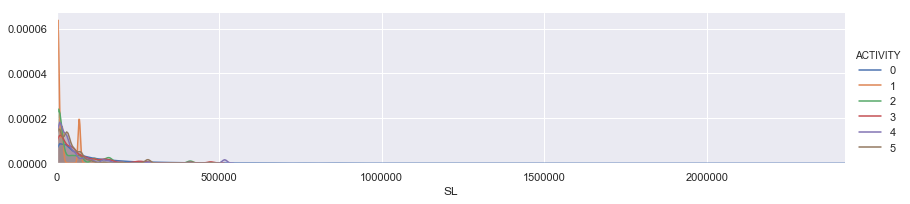

In [28]:
#Activity vs Sugar level
facet = sns.FacetGrid(df1, hue="ACTIVITY",aspect=4)
facet.map(sns.kdeplot,'SL',shade= True)
facet.set(xlim=(0, df1['SL'].max()))
facet.add_legend();    #sugar lavel effecting more on walking

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


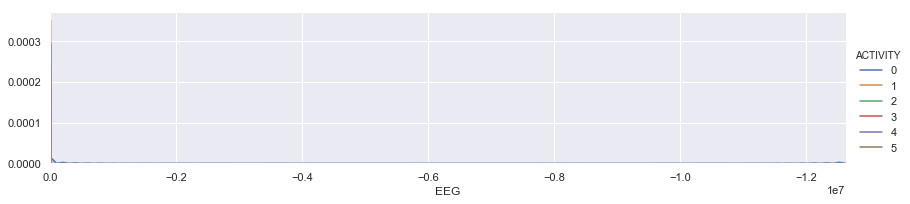

In [32]:
#activity vs EEG
facet = sns.FacetGrid(df1, hue="ACTIVITY",aspect=4)
facet.map(sns.kdeplot,'EEG',shade= True)
facet.set(xlim=(0, df1['EEG'].min()))
facet.add_legend();   #not at all effecting

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


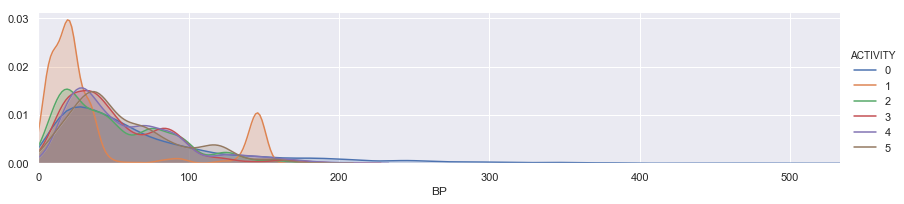

In [33]:
#BP vs activity
facet = sns.FacetGrid(df1, hue="ACTIVITY",aspect=4)
facet.map(sns.kdeplot,'BP',shade= True)
facet.set(xlim=(0, df1['BP'].max()))
facet.add_legend();    #no effects

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


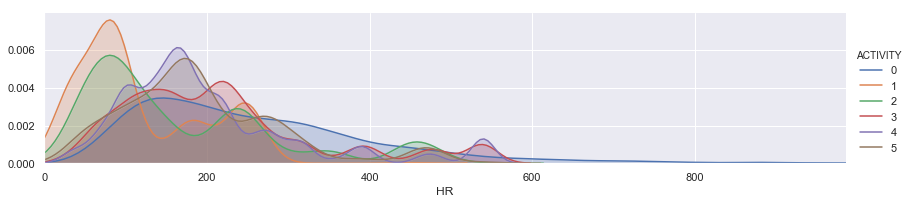

In [34]:
#Heart rate vs activity
facet = sns.FacetGrid(df1, hue="ACTIVITY",aspect=4)
facet.map(sns.kdeplot,'HR',shade= True)
facet.set(xlim=(0, df1['HR'].max()))
facet.add_legend(); 

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


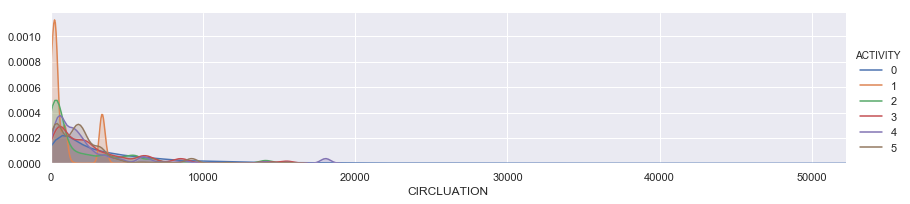

In [36]:
#circulation vs Activity
facet = sns.FacetGrid(df1, hue="ACTIVITY",aspect=4)
facet.map(sns.kdeplot,'CIRCLUATION',shade= True)
facet.set(xlim=(0, df1['CIRCLUATION'].max()))
facet.add_legend(); 

In [37]:
#correlation table
df1.corr().T

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
ACTIVITY,1.000000,-0.110405,-0.146789,0.027084,-0.116499,-0.144609,-0.134331
TIME,-0.110405,1.000000,0.843200,-0.048278,0.442334,0.973901,0.876956
SL,-0.146789,0.843200,1.000000,-0.050946,0.401064,0.859408,0.978060
EEG,0.027084,-0.048278,-0.050946,1.000000,-0.049892,-0.050316,-0.050408
BP,-0.116499,0.442334,0.401064,-0.049892,1.000000,0.469164,0.419356
HR,-0.144609,0.973901,0.859408,-0.050316,0.469164,1.000000,0.904160
CIRCLUATION,-0.134331,0.876956,0.978060,-0.050408,0.419356,0.904160,1.000000


## Outlier Treatment

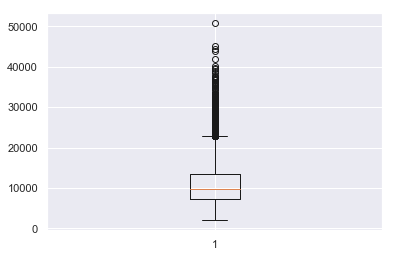

In [39]:
#the numbers above 1.5 iqr and below -1.5 iqr are removed
# outlier treatment for Time
plt.boxplot(df1.TIME)
Q1 = df1.TIME.quantile(0.25)
Q3 = df1.TIME.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1.TIME >= Q1 - 1.5*IQR) & (df1.TIME <= Q3 + 1.5*IQR)]

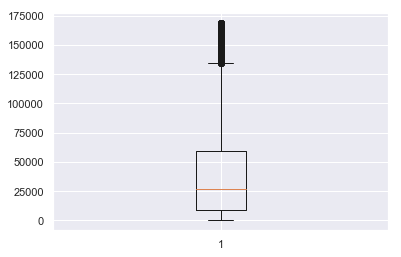

In [42]:
# outlier treatment for Sugar levels
plt.boxplot(df1.SL)
Q1 = df1.SL.quantile(0.25)
Q3 = df1.SL.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1.SL >= Q1 - 1.5*IQR) & (df1.SL <= Q3 + 1.5*IQR)]

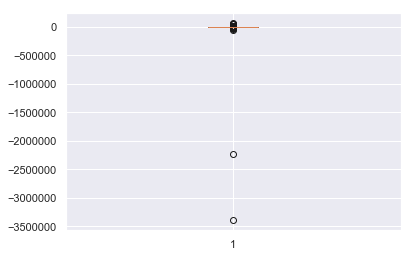

In [44]:
#outlier treatment for EEG monetering 
plt.boxplot(df1.EEG)
Q1 = df1.EEG.quantile(0.25)
Q3 = df1.EEG.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1.EEG >= Q1 - 1.5*IQR) & (df1.EEG <= Q3 + 1.5*IQR)]

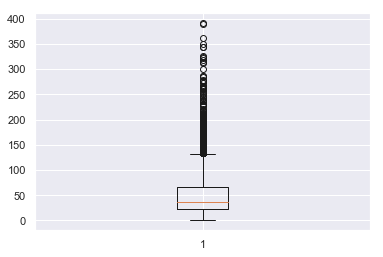

In [45]:
#outlier treatment for BP
plt.boxplot(df1.BP)
Q1 = df1.BP.quantile(0.25)
Q3 = df1.BP.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1.BP >= Q1 - 1.5*IQR) & (df1.BP <= Q3 + 1.5*IQR)]

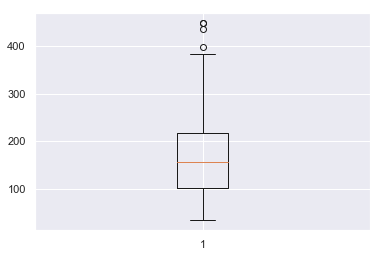

In [46]:
#outlier treatment for Heartrate
plt.boxplot(df1.HR)
Q1 = df1.HR.quantile(0.25)
Q3 = df1.HR.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1.HR >= Q1 - 1.5*IQR) & (df1.HR <= Q3 + 1.5*IQR)]

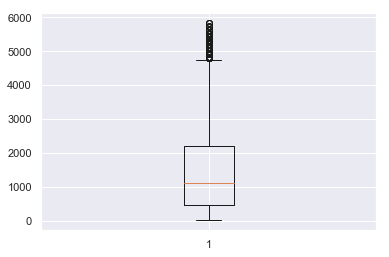

In [47]:
#outlier treatment for Circulation
plt.boxplot(df1.CIRCLUATION)
Q1 = df1.CIRCLUATION.quantile(0.25)
Q3 = df1.CIRCLUATION.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1.CIRCLUATION >= Q1 - 1.5*IQR) & (df1.CIRCLUATION <= Q3 + 1.5*IQR)]

## Which of the variables explain the activity best? 

In [50]:
df1.corr()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
ACTIVITY,1.000000,0.056586,0.022445,0.127157,0.136753,0.026753,0.043593
TIME,0.056586,1.000000,0.869579,-0.771555,0.218652,0.953095,0.857410
SL,0.022445,0.869579,1.000000,-0.726154,0.142462,0.895579,0.982513
EEG,0.127157,-0.771555,-0.726154,1.000000,-0.224860,-0.840408,-0.751493
BP,0.136753,0.218652,0.142462,-0.224860,1.000000,0.219432,0.151395
HR,0.026753,0.953095,0.895579,-0.840408,0.219432,1.000000,0.909634
CIRCLUATION,0.043593,0.857410,0.982513,-0.751493,0.151395,0.909634,1.000000


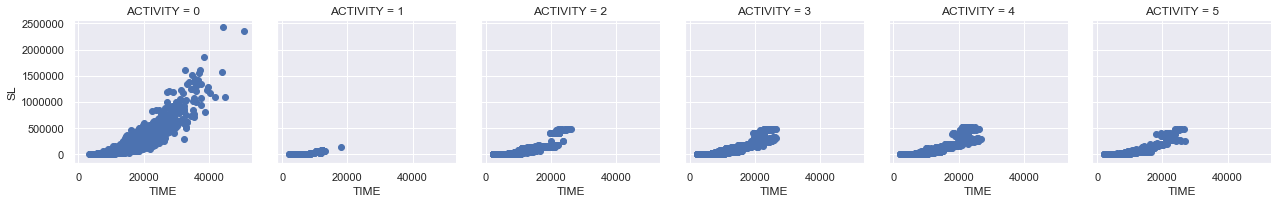

In [53]:
#Sugar level vs activity
g = sns.FacetGrid(raw, col="ACTIVITY") 
g.map(plt.scatter, "TIME", "SL")

In [56]:
# since there's one continous and category variale of 3 groups ,we perform anova  #statistical analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('ACTIVITY ~ SL+TIME+EEG+BP+HR+CIRCLUATION',
                data=df1).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)  #its showing significant difference between all features and activity since p-value less then 0.05

                   sum_sq       df            F         PR(>F)
SL            1236.445023      1.0   500.441885  9.493685e-109
TIME           584.205026      1.0   236.452619   6.990803e-53
EEG           2863.962275      1.0  1159.167332  3.275542e-243
BP             804.832921      1.0   325.750111   6.400703e-72
HR              25.701022      1.0    10.402297   1.261773e-03
CIRCLUATION   1322.142003      1.0   535.127097  5.331677e-116
Residual     31365.619163  12695.0          NaN            NaN


In [94]:
#lest see multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif["features"] = df1.columns      #time has 88.45 variance influence factor

In [95]:
vif.head()

,VIF Factor,features
0,3.628194,ACTIVITY
1,88.459643,TIME
2,67.777524,SL
3,17.468378,EEG
4,3.535270,BP


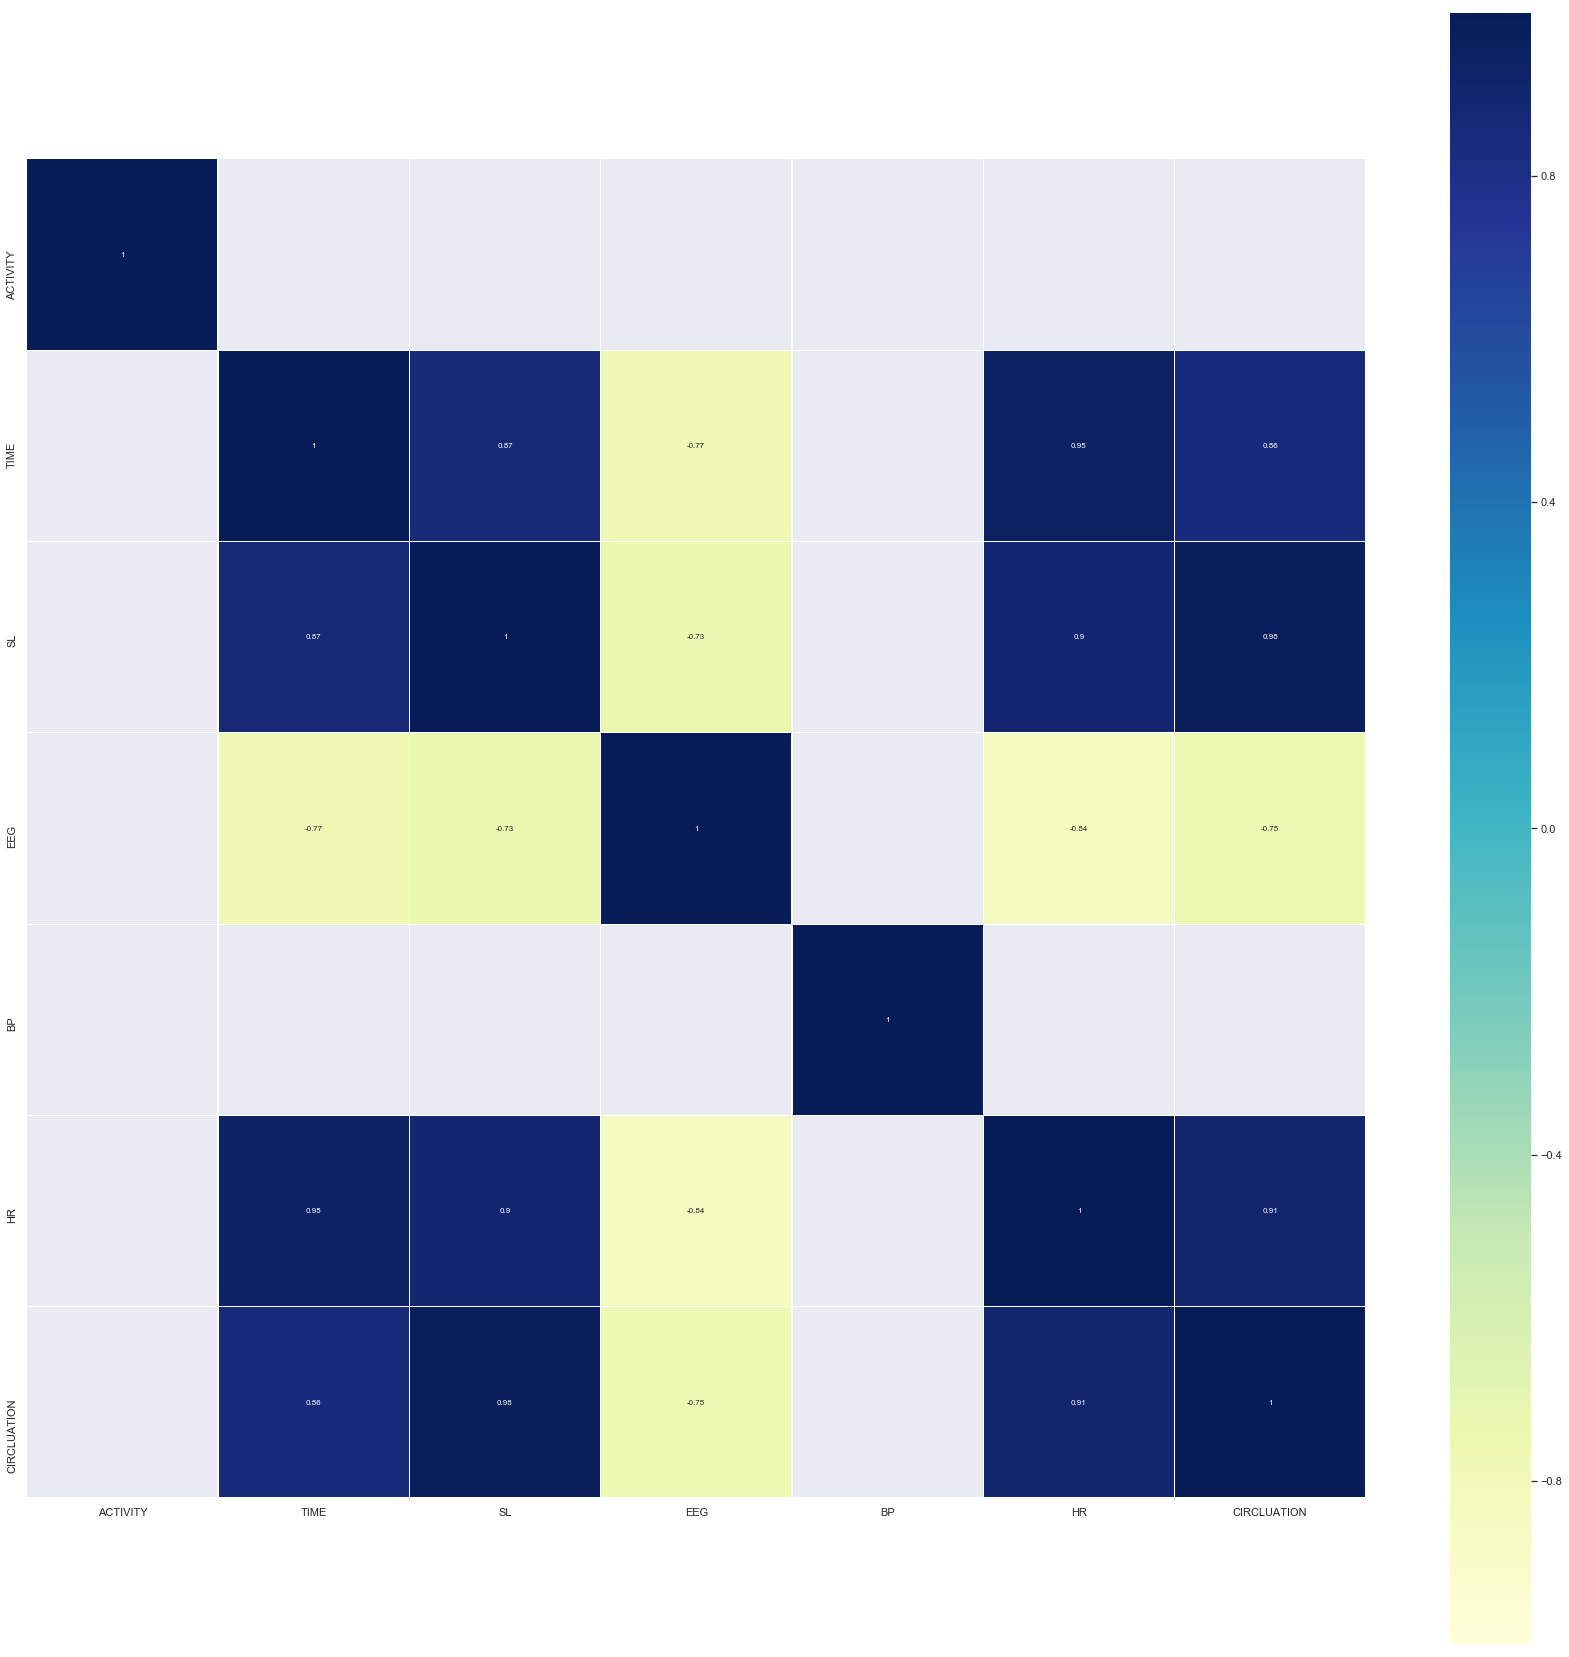

In [59]:
import matplotlib.pyplot as plt
corr=df1.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## Scalling  (Z_Score)

In [65]:
features=df1.iloc[:,1:]

In [70]:
features.head()

,TIME,SL,EEG,BP,HR,CIRCLUATION
0,4722.92,4019.64,-1600.00,13,79,317
1,4059.12,2191.03,-1146.08,20,54,165
2,4773.56,2787.99,-1263.38,46,67,224
3,8271.27,9545.98,-2848.93,26,138,554
4,7102.16,14148.80,-2381.15,85,120,809


In [67]:
from scipy.stats import zscore
z_data= features.apply(zscore)
z_data.head()

,TIME,SL,EEG,BP,HR,CIRCLUATION
0,-1.340902,-0.902301,0.899008,-1.056337,-1.144372,-0.933099
1,-1.553310,-0.966861,1.175212,-0.819487,-1.501919,-1.063015
2,-1.324698,-0.945785,1.103836,0.060239,-1.315995,-1.012587
3,-0.205474,-0.707191,0.139051,-0.616473,-0.300563,-0.730533
4,-0.579575,-0.544686,0.423689,1.379829,-0.557996,-0.512582


## PCA  (Principle Component Analysis)

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6, svd_solver='full')

In [107]:
#features.head()

In [108]:
pca.fit(z_data) # only features
print(pca.explained_variance_ratio_)

[0.74707445 0.1600023  0.05490074 0.02969621 0.00636026 0.00196604]


In [109]:
#cummulative sum
pca.explained_variance_ratio_.cumsum()

array([0.74707445, 0.90707675, 0.96197749, 0.9916737 , 0.99803396,
       1.        ])

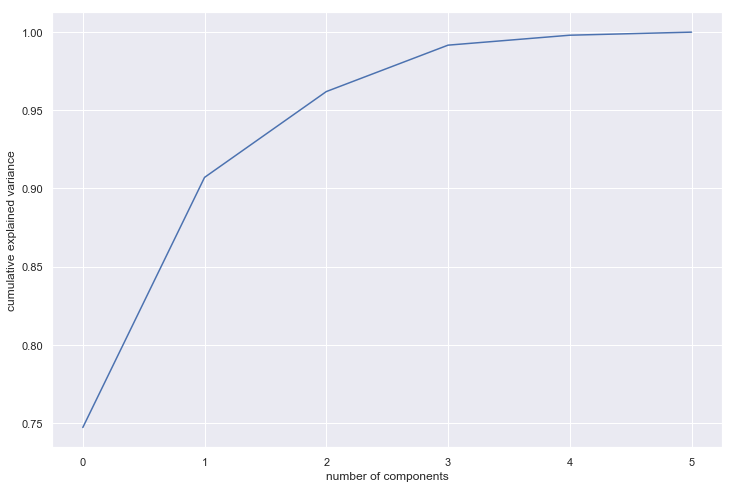

In [110]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [111]:
#first two pca features itselfs explains 90% the best activity.

In [112]:
#taking first 3 features as it explains 96% of whole variance
from sklearn.decomposition import PCA
pca = PCA(n_components=3)# based on cummulative sum take 85+
principalComponents = pca.fit_transform(z_data)
principalComponents

array([[-2.45009807, -0.78243838, -0.04782848],
       [-2.88206716, -0.52087951,  0.15583869],
       [-2.52552702,  0.32793889,  0.22698462],
       ...,
       [-0.17445352, -0.36190791,  0.01625341],
       [-0.0161131 ,  1.76448634,  0.27775689],
       [ 0.52219858, -0.88451387,  0.20690495]])

In [113]:
#convert above array to dataframe
principalDf = pd.DataFrame(data = principalComponents,columns=["PC1","PC2","PC3"])
principalDf.head()

,PC1,PC2,PC3
0,-2.450098,-0.782438,-0.047828
1,-2.882067,-0.520880,0.155839
2,-2.525527,0.327939,0.226985
3,-1.008891,-0.420218,-0.491031
4,-0.997975,1.501014,0.138257


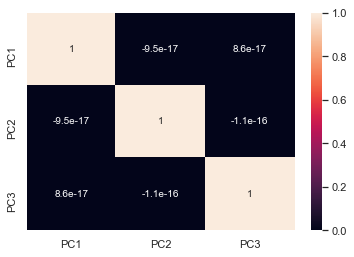

In [114]:
#heat map for reduced dimentions
sns.heatmap(principalDf.corr(),annot = True)

## Clustering the z_data

In [115]:
#imports for clustering
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

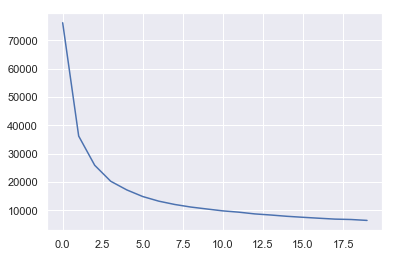

In [116]:
#ELBOW graph
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(z_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
#take k=5

In [152]:
model_clus = KMeans(n_clusters = 5, max_iter=50)
model_clus.fit(z_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [153]:
z_data.head()

,TIME,SL,EEG,BP,HR,CIRCLUATION
0,-1.340902,-0.902301,0.899008,-1.056337,-1.144372,-0.933099
1,-1.553310,-0.966861,1.175212,-0.819487,-1.501919,-1.063015
2,-1.324698,-0.945785,1.103836,0.060239,-1.315995,-1.012587
3,-0.205474,-0.707191,0.139051,-0.616473,-0.300563,-0.730533
4,-0.579575,-0.544686,0.423689,1.379829,-0.557996,-0.512582


In [154]:
# analysis of clusters formed
z_data.index = pd.RangeIndex(len(z_data.index))
cluster = pd.concat([z_data, pd.Series(model_clus.labels_)], axis=1)
cluster.columns = ['TIME', 'Sugar_Level','EEG_Monetering', 'Blood_pressure','Heart_rate','Circluation', 'ClusterID']

In [155]:
cluster.head()

,TIME,Sugar_Level,EEG_Monetering,Blood_pressure,Heart_rate,Circluation,ClusterID
0,-1.340902,-0.902301,0.899008,-1.056337,-1.144372,-0.933099,0
1,-1.553310,-0.966861,1.175212,-0.819487,-1.501919,-1.063015,0
2,-1.324698,-0.945785,1.103836,0.060239,-1.315995,-1.012587,0
3,-0.205474,-0.707191,0.139051,-0.616473,-0.300563,-0.730533,2
4,-0.579575,-0.544686,0.423689,1.379829,-0.557996,-0.512582,4


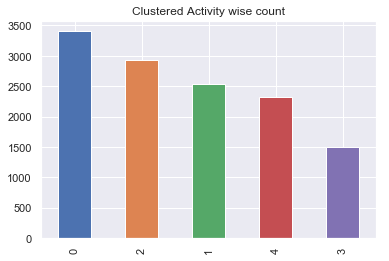

In [172]:
#bar
cluster.ClusterID.value_counts().plot(kind="bar", title='Clustered Activity wise count')

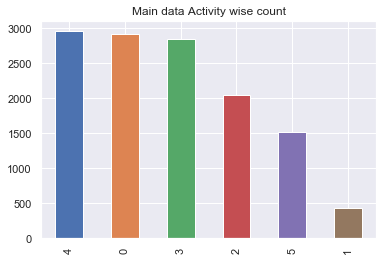

In [174]:
#Activity wise bar  of given dataframe
df1.ACTIVITY.value_counts().plot(kind="bar", title='Main data Activity wise count')

## Lets cluster the PCA data   (Reduced dimentional data)

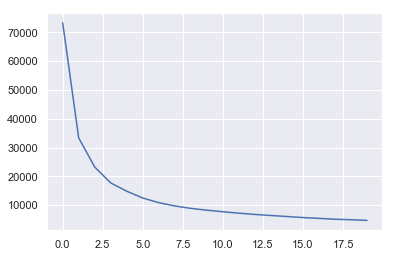

In [121]:
#ELBOW graph
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(principalDf)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
#take k=5

In [104]:
model_clus1 = KMeans(n_clusters = 5, max_iter=50)
model_clus1.fit(principalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [159]:
# analysis of clusters formed
principalDf.index = pd.RangeIndex(len(principalDf.index))
cluster1 = pd.concat([principalDf, pd.Series(model_clus1.labels_)], axis=1)
cluster1.columns = ['PC1', 'PC2','PC3', 'ClusterID']

In [160]:
cluster1.head()

,PC1,PC2,PC3,ClusterID
0,-2.450098,-0.782438,-0.047828,0
1,-2.882067,-0.520880,0.155839,0
2,-2.525527,0.327939,0.226985,0
3,-1.008891,-0.420218,-0.491031,2
4,-0.997975,1.501014,0.138257,3


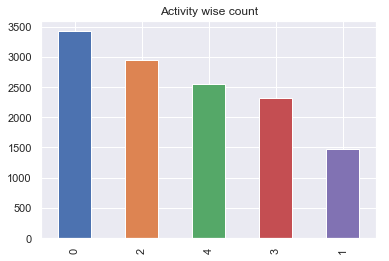

In [161]:
cluster1.ClusterID.value_counts().plot(kind="bar", title='Activity wise count')

### Between Heartrate and BP which gives the best cluster for activities? Explain your answer

In [162]:
features.head()

,TIME,SL,EEG,BP,HR,CIRCLUATION
0,4722.92,4019.64,-1600.00,13,79,317
1,4059.12,2191.03,-1146.08,20,54,165
2,4773.56,2787.99,-1263.38,46,67,224
3,8271.27,9545.98,-2848.93,26,138,554
4,7102.16,14148.80,-2381.15,85,120,809


### droping BP label

In [163]:
#droping BP feature
df2 = features.drop(labels = "BP", axis = 1)
df2.head()

,TIME,SL,EEG,HR,CIRCLUATION
0,4722.92,4019.64,-1600.00,79,317
1,4059.12,2191.03,-1146.08,54,165
2,4773.56,2787.99,-1263.38,67,224
3,8271.27,9545.98,-2848.93,138,554
4,7102.16,14148.80,-2381.15,120,809


In [164]:
#aplying z_score
from scipy.stats import zscore
z_data1= df2.apply(zscore)
z_data1.head()

,TIME,SL,EEG,HR,CIRCLUATION
0,-1.340902,-0.902301,0.899008,-1.144372,-0.933099
1,-1.553310,-0.966861,1.175212,-1.501919,-1.063015
2,-1.324698,-0.945785,1.103836,-1.315995,-1.012587
3,-0.205474,-0.707191,0.139051,-0.300563,-0.730533
4,-0.579575,-0.544686,0.423689,-0.557996,-0.512582


In [165]:
#applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5, svd_solver='full')

In [166]:
pca.fit(z_data1) # only features
print(pca.explained_variance_ratio_)

[0.88604819 0.06786218 0.03609233 0.00763668 0.00236061]


In [167]:
#cummulative sum
pca.explained_variance_ratio_.cumsum()

array([0.88604819, 0.95391037, 0.9900027 , 0.99763939, 1.        ])

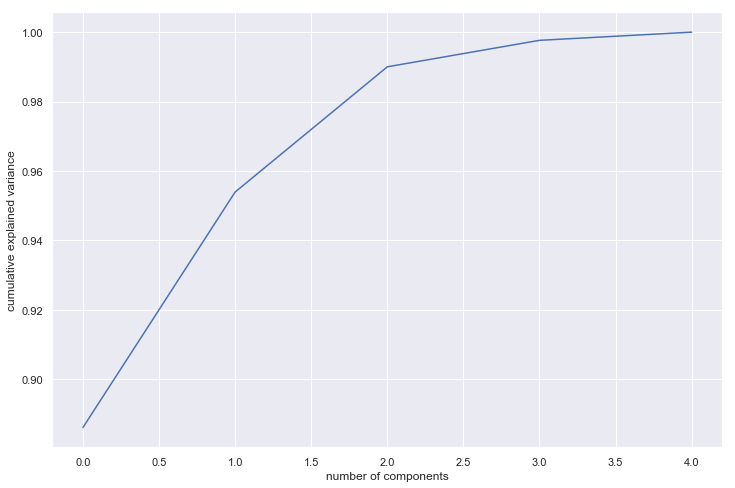

In [134]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
#with out BP feature only 2 components explains 95% of whole variance
#in the previous one, where BP is included,3 components says 96% of whole variance

### Clusteing with out BP feature

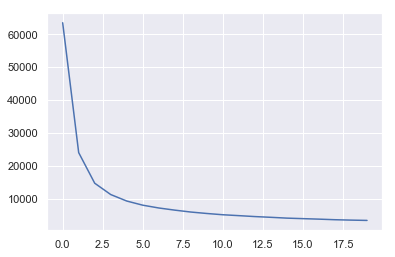

In [140]:
#ELBOW graph
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus2 = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus2.fit(z_data1)
    ssd.append(model_clus2.inertia_)

plt.plot(ssd)
#take k=5

In [168]:
model_clus2 = KMeans(n_clusters = 5, max_iter=50)
model_clus2.fit(z_data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [169]:
# analysis of clusters formed
z_data1.index = pd.RangeIndex(len(z_data1.index))
cluster2 = pd.concat([z_data1, pd.Series(model_clus2.labels_)], axis=1)
cluster2.columns = ['TIME', 'Sugar_Level','EEG_Monetering','Heart_rate','Circluation', 'ClusterID']

In [148]:
cluster2.head()

,TIME,Sugar_Level,EEG_Monetering,Heart_rate,Circluation,ClusterID
0,-1.340902,-0.902301,0.899008,-1.144372,-0.933099,2
1,-1.553310,-0.966861,1.175212,-1.501919,-1.063015,2
2,-1.324698,-0.945785,1.103836,-1.315995,-1.012587,2
3,-0.205474,-0.707191,0.139051,-0.300563,-0.730533,4
4,-0.579575,-0.544686,0.423689,-0.557996,-0.512582,4


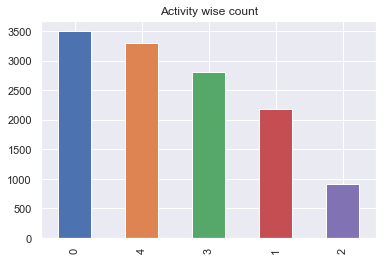

In [170]:
cluster2.ClusterID.value_counts().plot(kind="bar", title='Activity wise count')

#### droping HR label

In [135]:
#droping Heart rate feature
df3 = features.drop(labels = "HR", axis = 1)
df3.head()

,TIME,SL,EEG,BP,CIRCLUATION
0,4722.92,4019.64,-1600.00,13,317
1,4059.12,2191.03,-1146.08,20,165
2,4773.56,2787.99,-1263.38,46,224
3,8271.27,9545.98,-2848.93,26,554
4,7102.16,14148.80,-2381.15,85,809


In [136]:
#aplying z_score
from scipy.stats import zscore
z_data2= df3.apply(zscore)
z_data2.head()

,TIME,SL,EEG,BP,CIRCLUATION
0,-1.340902,-0.902301,0.899008,-1.056337,-0.933099
1,-1.553310,-0.966861,1.175212,-0.819487,-1.063015
2,-1.324698,-0.945785,1.103836,0.060239,-1.012587
3,-0.205474,-0.707191,0.139051,-0.616473,-0.730533
4,-0.579575,-0.544686,0.423689,1.379829,-0.512582


In [137]:
pca.fit(z_data2) # only features
print(pca.explained_variance_ratio_)

[0.7076225  0.19181165 0.06558586 0.03183672 0.00314327]


In [139]:
#cummulative sum
pca.explained_variance_ratio_.cumsum()

array([0.7076225 , 0.89943415, 0.96502001, 0.99685673, 1.        ])

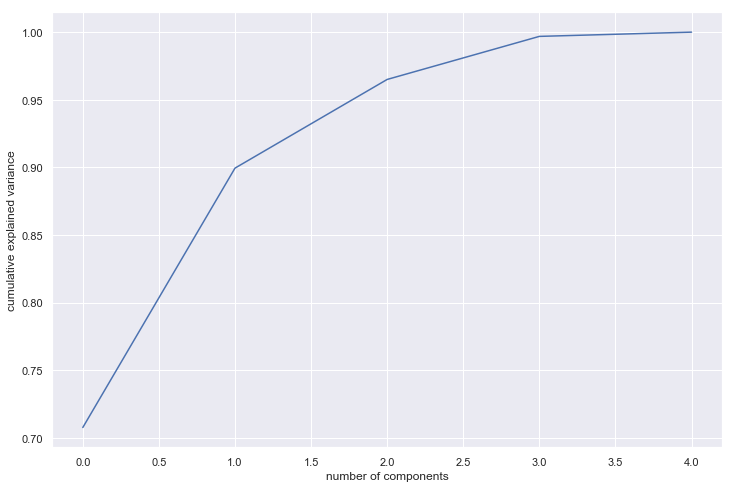

In [138]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
#with out Heart rate feature ,3 components explains 96% of whole variance

### Clustering without Heart Rate feature

In [149]:
model_clus3 = KMeans(n_clusters = 5, max_iter=50)
model_clus3.fit(z_data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [150]:
# analysis of clusters formed
z_data2.index = pd.RangeIndex(len(z_data2.index))
cluster3 = pd.concat([z_data2, pd.Series(model_clus3.labels_)], axis=1)
cluster3.columns = ['TIME', 'Sugar_Level','EEG_Monetering','BP','Circluation', 'ClusterID']

In [151]:
cluster3.head()

,TIME,Sugar_Level,EEG_Monetering,BP,Circluation,ClusterID
0,-1.340902,-0.902301,0.899008,-1.056337,-0.933099,1
1,-1.553310,-0.966861,1.175212,-0.819487,-1.063015,1
2,-1.324698,-0.945785,1.103836,0.060239,-1.012587,1
3,-0.205474,-0.707191,0.139051,-0.616473,-0.730533,0
4,-0.579575,-0.544686,0.423689,1.379829,-0.512582,3


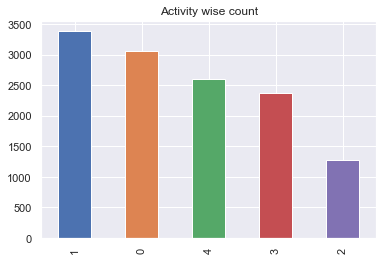

In [171]:
cluster3.ClusterID.value_counts().plot(kind="bar", title='Activity wise count')

In [177]:
from sklearn.metrics.cluster import v_measure_score
v_measure_score(df1.ACTIVITY,cluster3.ClusterID)

0.04291975544586461

### Activity count wise bar and clustered activity count wise bar plot

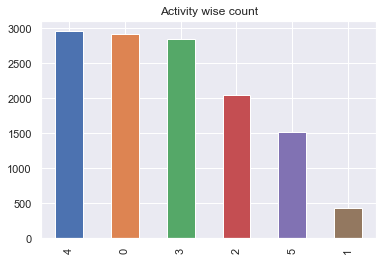

In [178]:
#main data frame activity bar plot
df1.ACTIVITY.value_counts().plot(kind="bar", title='Activity wise count')

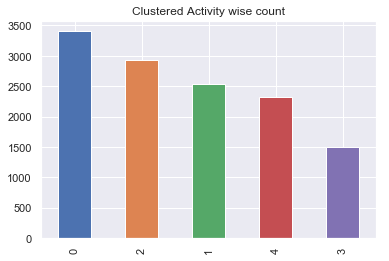

In [179]:
#Clustered activity bar plot
cluster.ClusterID.value_counts().plot(kind="bar", title='Clustered Activity wise count')

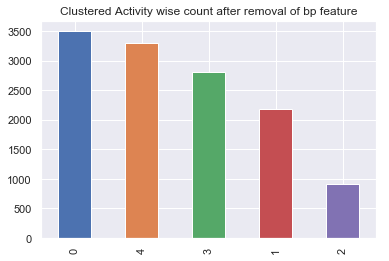

In [180]:
#Clustered activity bar plot after removing Blood pressure feature
cluster2.ClusterID.value_counts().plot(kind="bar", title='Clustered Activity wise count after removal of bp feature')

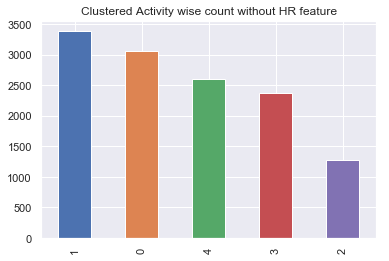

In [181]:
#Clustered activity bar plot after removal of heart rate feature
cluster3.ClusterID.value_counts().plot(kind="bar", title='Clustered Activity wise count without HR feature')

###  Between Heartrate and BP which gives the best cluster for activities? 

- After removal of HR and BP vice versa ,both giving the  cluster rates but not as much better as all the features involved in clustering
- Since HR and BP are  not having any multicollinearity (not correlated to each other),they both itselfs gives the best cluster for activities.
- Removal of either HR or BP gives a slight change in Clustering